In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [88]:
data = pd.read_csv("housing.csv")

In [89]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [91]:
# drop null values
data.dropna(inplace=True)#inplace se data save hogya

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [93]:
#data spliting
from sklearn.model_selection import train_test_split


In [94]:
x=data.drop(['median_house_value'],axis=1)#removing column
y=data['median_house_value']

In [95]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [96]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [98]:
train_data=x_train.join(y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

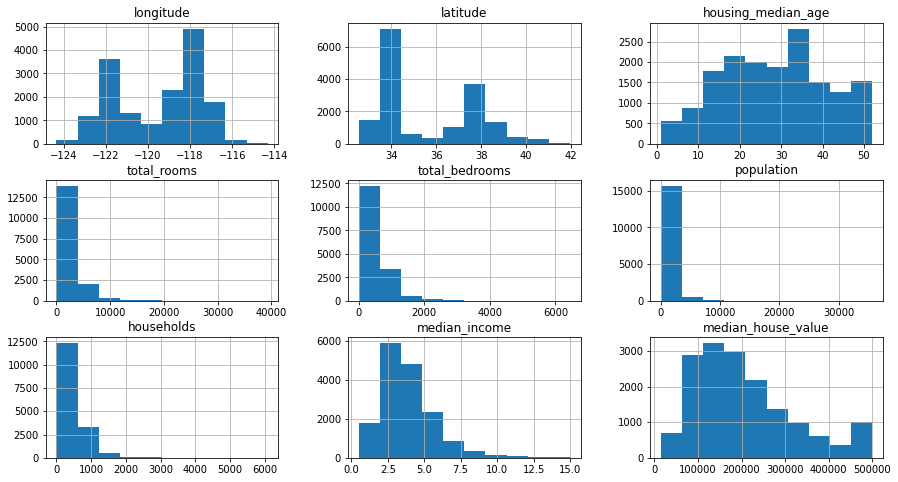

In [99]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

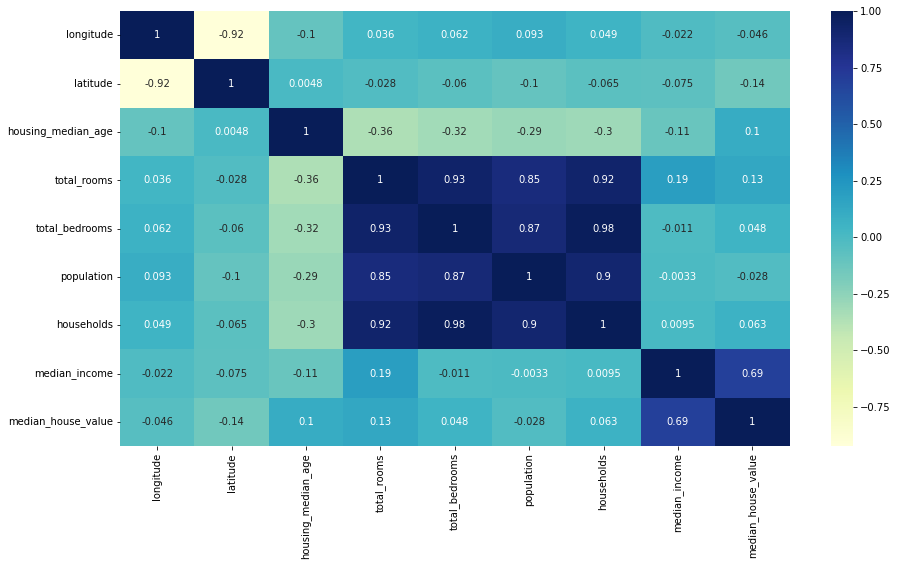

In [100]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [101]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

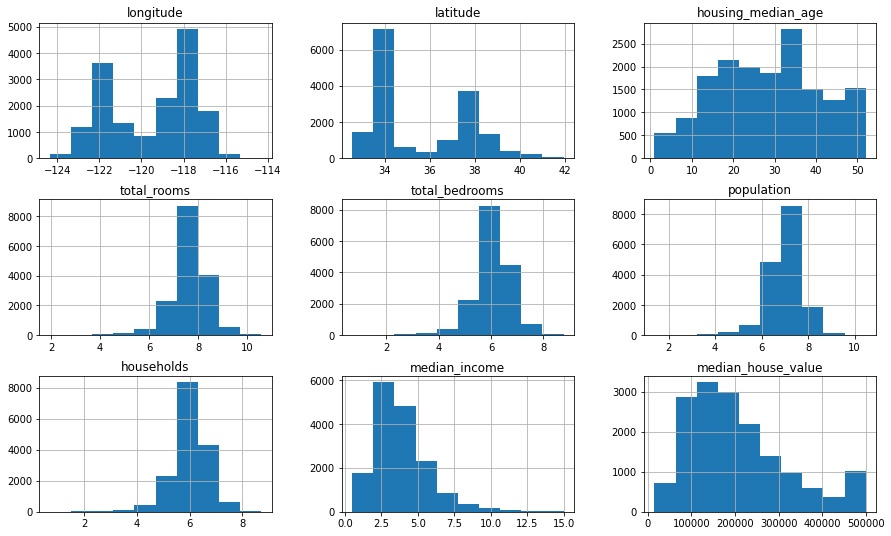

In [102]:
train_data.hist(figsize=(15,9))

In [103]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7265
INLAND        5179
NEAR OCEAN    2111
NEAR BAY      1787
ISLAND           4
Name: ocean_proximity, dtype: int64

In [104]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)# to 0 or 1

In [105]:
train_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10587,-117.77,33.69,14.0,7.254178,5.921578,6.613384,5.826000,3.7988,184100.0,1,0,0,0,0
19124,-122.65,38.24,49.0,8.093768,6.363028,7.266827,6.291569,4.2750,227600.0,1,0,0,0,0
15408,-117.23,33.22,16.0,8.078688,6.593045,6.944087,6.411818,2.0246,148800.0,1,0,0,0,0
1219,-120.91,38.11,9.0,8.184793,6.523562,7.496097,6.395262,3.6360,133100.0,0,1,0,0,0
7762,-118.10,33.91,36.0,6.985642,5.308268,6.579251,5.308268,4.2679,175800.0,1,0,0,0,0
8428,-118.36,33.92,26.0,8.215006,7.043160,7.744570,6.917706,2.6667,229300.0,1,0,0,0,0
7940,-118.12,33.86,44.0,7.887584,6.238325,7.153052,6.137727,4.3194,199500.0,1,0,0,0,0
2923,-119.03,35.36,41.0,7.844633,6.388561,7.202661,6.390241,1.9671,76800.0,0,1,0,0,0
13842,-117.32,34.55,18.0,5.634790,4.094345,5.241747,4.110874,0.8246,91700.0,0,1,0,0,0
7156,-118.15,34.04,44.0,6.473891,4.962845,6.126869,4.969813,3.6875,162500.0,1,0,0,0,0


<AxesSubplot:>

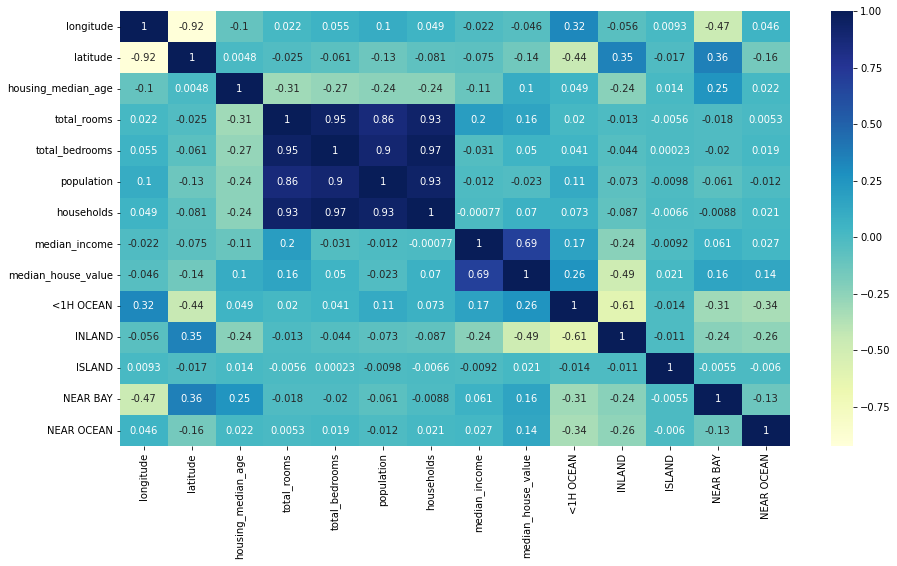

In [106]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

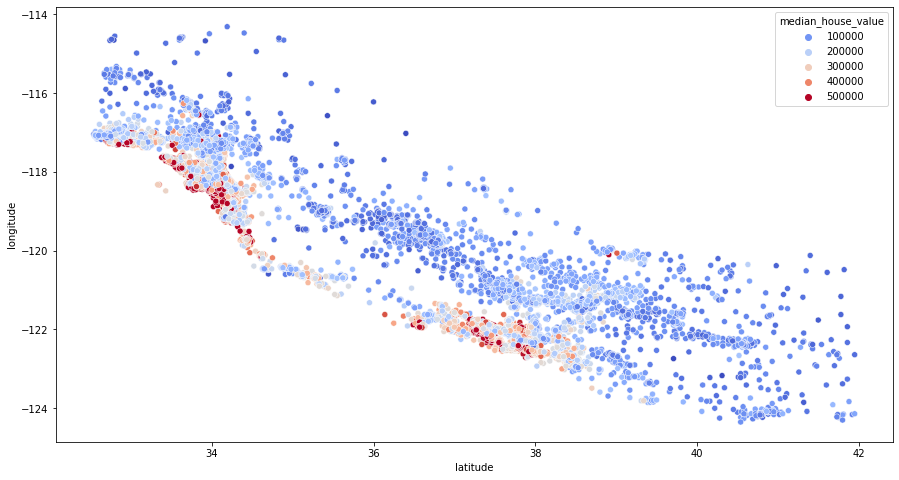

In [107]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

feature eng

In [108]:
train_data['bedroom_ratio']=train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms']= train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

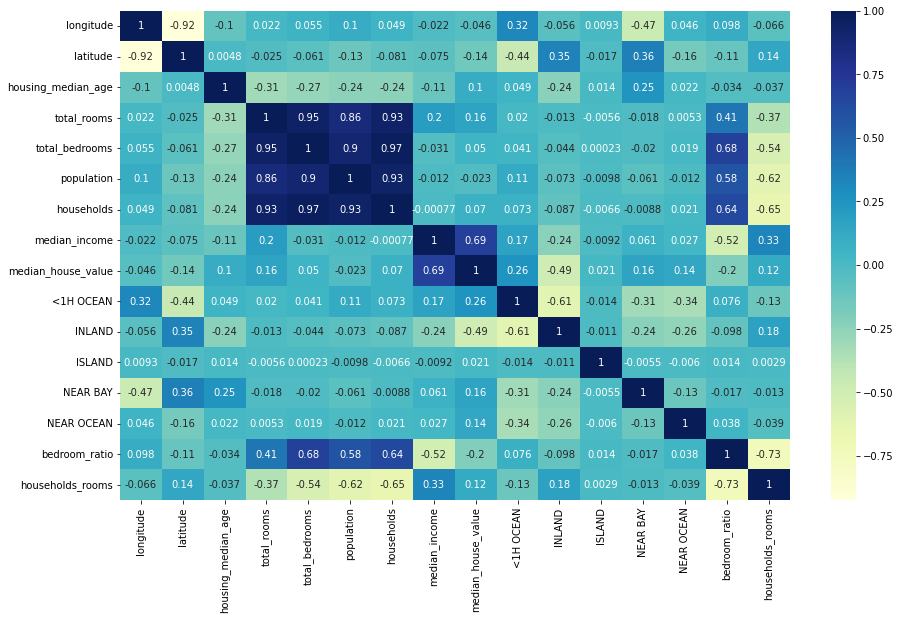

In [109]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [110]:
#linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
scaler =StandardScaler()

x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
#x_train_s=scaler.fit_transform(x_train)
reg=LinearRegression()

In [112]:
reg.fit(x_train,y_train)

LinearRegression()

In [113]:
test_data=x_test.join(y_test)

In [114]:
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)# to 0 or 1

In [115]:
test_data['bedroom_ratio']=test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms']= test_data['total_rooms'] / test_data['households']

In [116]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [117]:
#x_test_s=scaler.transform(x_test)
reg.score(x_test,y_test)*100

67.40360100481179

In [118]:
#RANDOM FOREST

In [119]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [120]:
forest.score(x_test,y_test)

0.8092433173259772

In [121]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()
param_grid={
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8],
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [122]:
best_forest=grid_search.best_estimator_

In [123]:
best_forest.score(x_test,y_test)

0.8077318471624291

In [127]:
from sklearn.metrics import accuracy_score
reg.score(x_test,y_test)

0.6740360100481179